In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

# Load and preprocess MNIST dataset

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)

(60000, 28, 28, 1) float32
(10000, 28, 28, 1) float32


# Draw MNIST examples

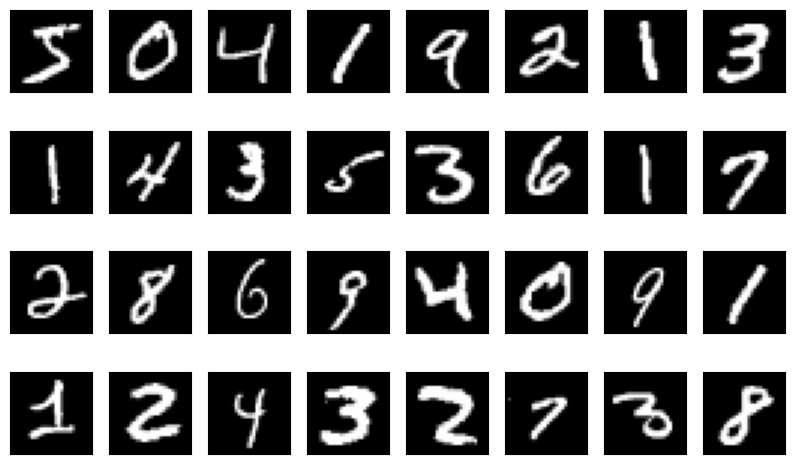

In [3]:
def plot_digits(samples):
    fig = plt.figure(figsize=(10, 6))
    num = samples.shape[0]
    for j in range(num):
        ax = fig.add_subplot(4, 8, j+1)
        ax.imshow(samples[j, :, :, 0], cmap='gray')
        plt.xticks([]), plt.yticks([])
    plt.show()
plot_digits(train_x[:32, ...])

# Create Autoencoder model: Encoder and Decoder

In [4]:
encoder = tf.keras.Sequential([
    tf.keras.layers.ZeroPadding2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid'),
    tf.keras.layers.Cropping2D((2, 2))
])

autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adadelta', loss='mse')

# Autoencoder training

In [5]:
NUM_EPOCHS = 25
BATCH_SIZE = 128

autoencoder.fit(train_x, train_x,
                epochs=NUM_EPOCHS,
                batch_size=BATCH_SIZE,
                shuffle=True,
                validation_data=(test_x, test_x))

Epoch 1/25
469/469 [==============================] - 16s 27ms/step - loss: 0.2314 - val_loss: 0.2311
Epoch 2/25
469/469 [==============================] - 10s 21ms/step - loss: 0.2306 - val_loss: 0.2303
Epoch 3/25
469/469 [==============================] - 10s 21ms/step - loss: 0.2297 - val_loss: 0.2292
Epoch 4/25
469/469 [==============================] - 10s 21ms/step - loss: 0.2285 - val_loss: 0.2279
Epoch 5/25
469/469 [==============================] - 10s 21ms/step - loss: 0.2270 - val_loss: 0.2263
Epoch 6/25
469/469 [==============================] - 10s 21ms/step - loss: 0.2251 - val_loss: 0.2241
Epoch 7/25
469/469 [==============================] - 10s 21ms/step - loss: 0.2227 - val_loss: 0.2214
Epoch 8/25
469/469 [==============================] - 10s 21ms/step - loss: 0.2195 - val_loss: 0.2177
Epoch 9/25
469/469 [==============================] - 10s 21ms/step - loss: 0.2152 - val_loss: 0.2126
Epoch 10/25
469/469 [==============================] - 10s 21ms/step - loss: 0.209

# Autoencoder inference test

1/1 [==============================] - 0s 461ms/step


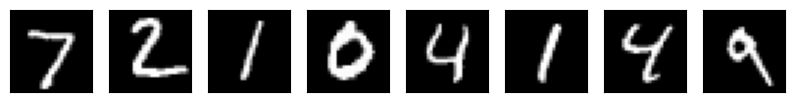

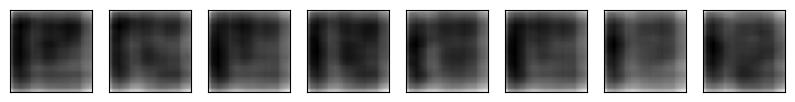

In [6]:
text_x_pred = autoencoder.predict(test_x[0:8])
plot_digits(test_x[0:8])
plot_digits(text_x_pred)

# Encoder infrrence test

1/1 [==============================] - 0s 255ms/step


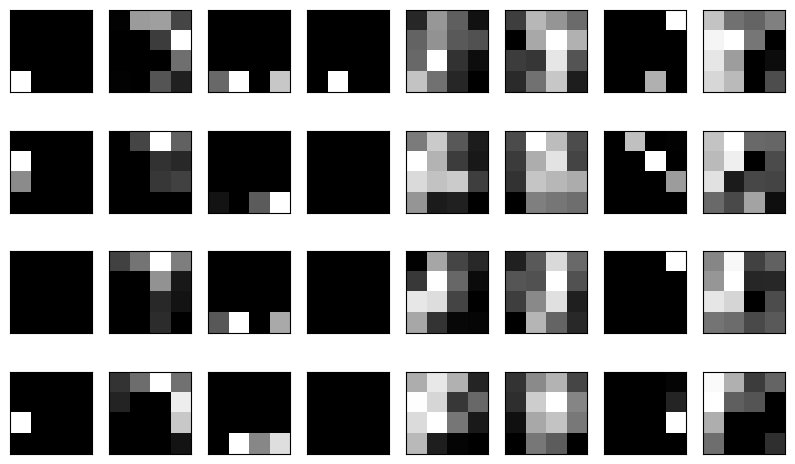

In [7]:
text_x_enc = encoder.predict(test_x[0:8])
plot_digits(text_x_enc[:4].transpose([0, 3, 1, 2]).reshape([-1, 4, 4, 1]))

# Decoder infrrence test: encoded inputs

1/1 [==============================] - 0s 232ms/step


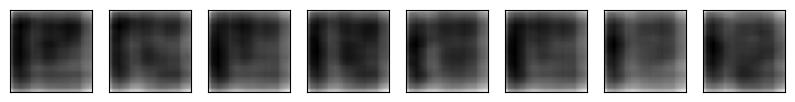

In [8]:
plot_digits(decoder.predict(text_x_enc))

# Decoder inference test: random imputs

1/1 [==============================] - 0s 11ms/step


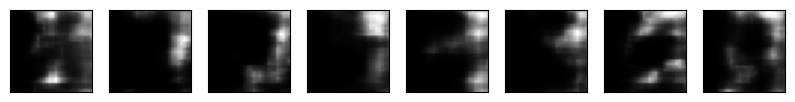

In [9]:
plot_digits(decoder.predict(np.random.rand(8, 4, 4, 8) * 5))

# Prepare noisy dataset (for Denoising AE)

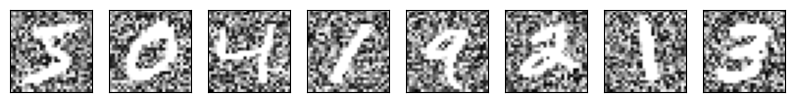

In [10]:
def add_noise(x):
    return np.clip(x + .5 + .5 * np.random.rand(*x.shape), 0, 1)

train_x_noise = add_noise(train_x)
test_x_noise = add_noise(test_x)

plot_digits(train_x_noise[:8])                   

# Denoising Autoencoder training

In [11]:
NUM_EPOCHS = 25
BATCH_SIZE = 128

autoencoder.fit(train_x_noise, train_x,
                epochs=NUM_EPOCHS,
                batch_size=BATCH_SIZE,
                shuffle=True,
                validation_data=(test_x_noise, test_x))

Epoch 1/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0987 - val_loss: 0.0999
Epoch 2/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0980 - val_loss: 0.0991
Epoch 3/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0972 - val_loss: 0.0983
Epoch 4/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0964 - val_loss: 0.0974
Epoch 5/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0956 - val_loss: 0.0967
Epoch 6/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0950 - val_loss: 0.0961
Epoch 7/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0944 - val_loss: 0.0955
Epoch 8/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0938 - val_loss: 0.0949
Epoch 9/25
469/469 [==============================] - 10s 21ms/step - loss: 0.0932 - val_loss: 0.0942
Epoch 10/25
469/469 [==============================] - 10s 21ms/step - loss: 0.092

# DEnoiseing Autoencoder inference test

1/1 [==============================] - 0s 13ms/step


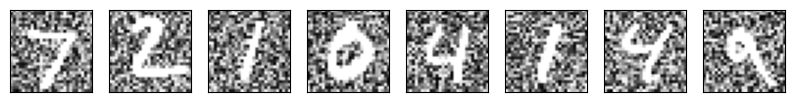

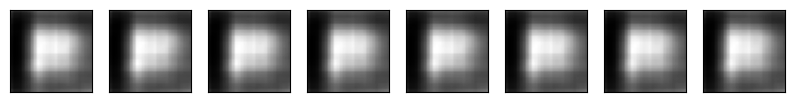

In [12]:
text_x_pred = autoencoder.predict(test_x_noise[0:8])

plot_digits(test_x_noise[0:8])
plot_digits(text_x_pred)